#### Explain how you can implement ML in a real world application.

#### Define the Problem:
Clearly articulate the problem you want to solve with ML. Understand the goals, objectives, and constraints of the problem.

#### Data Collection:
Gather relevant data that will be used to train and test your ML model. Ensure the data is representative of the real-world scenario you're addressing.

#### Data Preprocessing:
Clean and preprocess the data to handle missing values, outliers, and irrelevant information. Transform the data into a format suitable for training ML models.
#### Feature Engineering:
Identify and create relevant features from the raw data that can enhance the model's ability to learn patterns.
#### Model Selection:
Choose a suitable ML algorithm based on the nature of your problem (classification, regression, clustering, etc.). Consider factors such as the size of the dataset, interpretability, and computational requirements.

#### Model Training:
Split your dataset into training and validation sets. Train the ML model using the training data, and fine-tune its parameters to achieve the best performance.

#### Evaluation:
Assess the model's performance on the validation set using appropriate metrics (accuracy, precision, recall, F1-score, etc.). This step helps identify whether the model is generalizing well to new, unseen data.

#### Hyperparameter Tuning:
Adjust the hyperparameters of your model to optimize its performance. This may involve techniques like grid search or random search.
##### Validation and Testing:
Validate the final model on a separate test dataset to ensure its generalization to new, unseen data.
#### Deployment:
Once satisfied with the model's performance, deploy it to a production environment. This involves integrating the model into your application or system.
#### Monitoring and Maintenance:
Continuously monitor the performance of the deployed model in a real-world setting. Implement mechanisms to retrain the model periodically with new data to adapt to changing patterns.
#### Feedback Loop:
Establish a feedback loop for continuous improvement. Gather feedback from end-users and stakeholders to make necessary adjustments and enhancements to the ML model.
#### Privacy and Ethics:
Address privacy concerns and ethical considerations associated with the data and model. Ensure compliance with regulations and ethical standards.
#### Documentation:
Document the entire ML pipeline, including data preprocessing, feature engineering, model training, and deployment. This documentation is crucial for transparency, reproducibility, and knowledge transfer.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
file_path = "Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)

In [3]:
# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [4]:
# Summary statistics
print(df.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [5]:
# Check for missing values
print(df.isnull().sum())


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


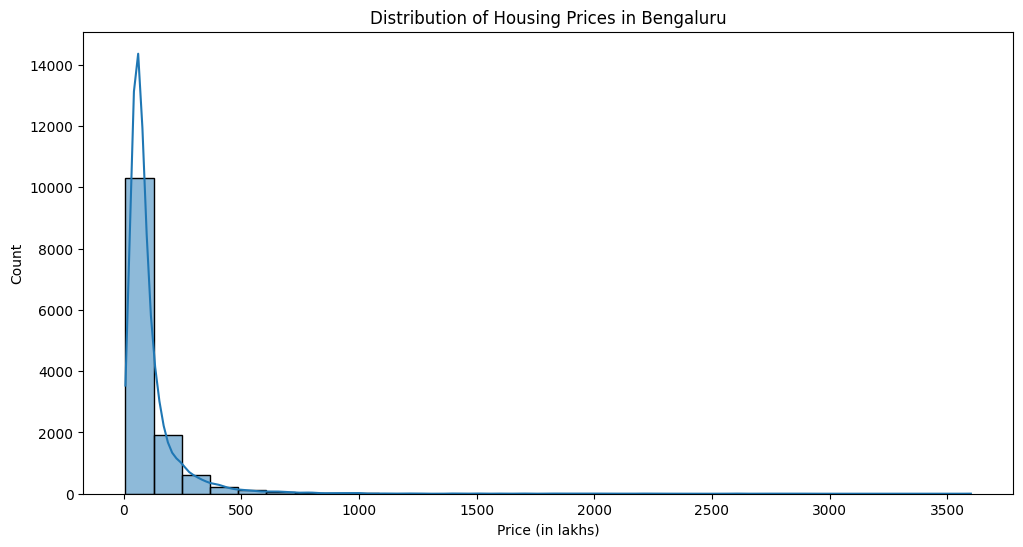

In [6]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices in Bengaluru')
plt.xlabel('Price (in lakhs)')
plt.show()


In [7]:
# Visualize the correlation between numerical features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Super built-up  Area'

In [8]:
# Feature Engineering
# Drop irrelevant columns
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [9]:
# Handle missing values
df['size'] = df['size'].fillna('2 BHK')  # Fill missing size values with the most common value
df['bath'] = df['bath'].fillna(df['bath'].median())  # Fill missing bath values with the median


In [10]:
# Extract numeric values from the 'size' column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['location', 'size', 'total_sqft'], drop_first=True)


In [12]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train the SVM Regressor
svm_regressor = SVR(kernel='linear')  # You can experiment with different kernels
svm_regressor.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [16]:
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12179.835570854528
